# Constraining the nuclear equation of state with GW170817

**Soumi De<sup>1</sup>, Daniel Finstad<sup>1</sup>, James M. Lattimer<sup>1</sup>, Duncan A. Brown<sup>1</sup>, Edo Berger<sup>2</sup>, Christopher M. Biwer<sup>1,3</sup>**

**<sup>1</sup>Department of Physics, Syracuse University, Syracuse, NY 13244, USA**

**<sup>1</sup>Department of Physics and Astronomy, Stony Brook University, Stony Brook, NY 11794-3800, USA**

**<sup>2</sup>Harvard-Smithsonian Center for Astrophysics, Cambridge, Massachusetts 02139, USA**

**<sup>3</sup>Applied Computer Science (CCS-7), Los Alamos National Laboratory, Los Alamos, NM, 87545, USA**

## License

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

## Introduction

This notebook is a companion to the paper posted at [XXXX](XXXX). It demonstrates how to read and use our posterior probability density files from the MCMC and shows how to reconstruct figures 2 and 3 in the main text and figures 2 and 4 in the supplementary material from the raw data.

We encourage use of these data in derivative works. If you use the material provided here, please cite the paper using the reference:
```
bibtex key here
```

The data provided contain the thinned posterior samples from the MCMC chains used to produce the posterior probability density plots shown in Figure 4. These data are stored in the files:

 1. [dns_mass_prior_common_eos_posteriors.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/dns_mass_prior_common_eos_posteriors.hdf)  contains the posterior samples from the MCMC where we use the common EOS constraint and the double neutron star mass prior.
 2. [galactic_ns_mass_prior_common_eos_posteriors.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/galactic_ns_mass_prior_common_eos_posteriors.hdf) containes the posterior samples from the MCMC where we use the common EOS constraint and the Galactic neutron star mass prior.
 3. [uniform_mass_prior_common_eos_posteriors.hdf](https://github.com/sugwg/common-eos/blob/master/uniform_mass_prior_common_eos_posteriors.hdf) contains the posterior samples from the MCMC where we use the common EOS constraint and the uniform [1.0, 2.0] $M_\odot$.
 4. [independent_lambda_uniform_mass_posterior.hdf](https://github.com/sugwg/common-eos/blob/master/independent_lambda_uniform_mass_posterior.hdf) contains the posterior samples from the MCMC where we do not apply the common EOS constraint allowing the tidal deformability parameters of the component stars to vary independently, and use a uniform [1.0, 2.0] $M_\odot$ mass prior.

The results used in the paper were generated with the [PyCBC v1.9.4 release.](https://github.com/gwastro/pycbc/releases/tag/v1.9.4)

## Runing this notebook in a Docker container

This notebook can be run from a PyCBC Docker container, or a machine with PyCBC installed. Instructions for [downloading the docker container](http://gwastro.github.io/pycbc/latest/html/docker.html) are available from the [PyCBC home page.](https://pycbc.org/) To start a container with instance of Jupyter notebook, run the commands
```sh
docker pull pycbc/pycbc-el7:v1.9.4
docker run -p 8888:8888 --name pycbc_notebook -it pycbc/pycbc-el7:v1.9.4 /bin/bash -l
```
Once the container has started, this git repository can be downloaded with the command:
```sh
git clone https://github.com/sugwg/gw170817-common-eos.git
```
The notebook server can be started inside the container with the command:
```sh
jupyter notebook --ip 0.0.0.0 --no-browser
```
You can then connect to the notebook server at the URL printed by ``jupyter``. Navigate to the directory `gw170817-common-eos` in the cloned git repository and open [data_release_common_eos_companion.ipynb](https://github.com/sugwg/gw170817-common-eos/blob/master/data_release_common_eos_companion.ipynb) (this notebook).

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import h5py
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pycbc.io.inference_hdf import InferenceFile
from pycbc.results.scatter_histograms import create_density_plot
import numpy
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 16

The data files store posteriors for the parameters that were varied, `variable_args` in the MCMC. To check these parameter names, use the appropriate file and do :

In [2]:
fp = h5py.File("dns_mass_prior_common_eos_posteriors.hdf", "r")
print fp.attrs['variable_args']
fp.close()

['tc' 'mass1' 'mass2' 'coa_phase' 'inclination' 'polarization' 'lambdasym'
 'spin1z' 'spin2z']


Posteriors for the `variable_args` are stored inside the `samples` group of the hdf data files. The files for our analyses using the common EOS stores posteriors for the $\Lambda_s$ parameter under the name `lambdasym`. To read posteriors for any of the `variable_args`, say `lambdasym`, do :

In [3]:
fp = h5py.File("dns_mass_prior_common_eos_posteriors.hdf", "r")
lambdasym_samples = fp['samples/lambdasym'][:]
fp.close()
print lambdasym_samples

[ 170.12359203  237.54924003  237.41241385 ...   97.69894907 1167.19802136
  235.4132539 ]


Using the PyCBC software, one can map the posteriors for the `variable_args` to other posteriors. PyCBC has several functions that can be used to do the general transforms between parameters. You can look in `pycbc.conversions`, `pycbc.coordinates`, `pycbc.cosmology` for the possible transforms that you can do with the available `variable_args`. For example, to obtain `lambda_tilde` from `mass1`, `mass2`, `lambda1`, `lambda2`, one would do :

In [4]:
from pycbc import conversions

fp=InferenceFile("independent_lambda_uniform_mass_posterior.hdf",'r')
mass1 = fp['samples/mass1'][:]
mass2 = fp['samples/mass2'][:]
lambda1 = fp['samples/lambda1'][:]
lambda2 = fp['samples/lambda2'][:]
fp.close()

lambda_tilde = conversions.lambda_tilde(mass1, mass2, lambda1, lambda2)
print lambda_tilde

[ 248.45839499  315.26194044  728.63777131 ...  798.04280893 1184.30059969
 1007.80105433]


To get the redshift from distance one have to would do :

In [5]:
from pycbc import cosmology

distance=40.7 # in Mpc
redshift=cosmology.redshift(distance)
print redshift

0.00904737955578


## To plot Fig. 2 - main text :
### $\Lambda_1 - \Lambda_2$ posterior probability density from common EOS constraint analyses

Using the following code one can make the plot for the uniform mass prior (left panel plot in the paper). For `filename` use `dns_mass_prior_common_eos_posteriors.hdf` to make the plot from the Double Neutron Stars mass prior analysis (middle panel), and use `galactic_ns_mass_prior_common_eos_posteriors.hdf` to make the plot from the Galactic Neutron Stars mass prior analysis (right panel).

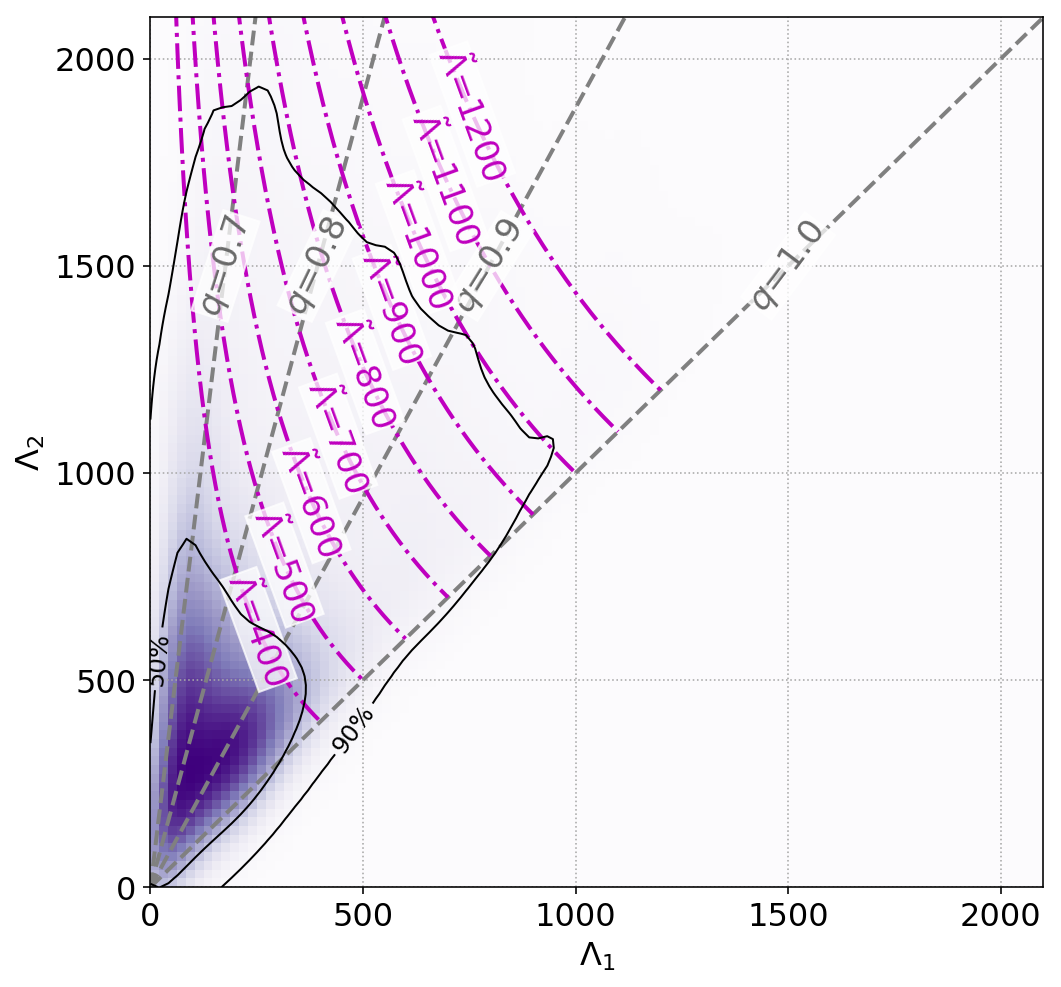

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
filename = 'uniform_mass_prior_common_eos_posteriors.hdf'

lambda1='lambdasym*((mass2/mass1)**3)'
lambda2='lambdasym*((mass1/mass2)**3)'

# read samples
params = [lambda1, lambda2]
with InferenceFile(filename, "r") as fp:
    samples = fp.read_samples(params)
    
# Make density plot
create_density_plot(lambda1, lambda2, samples, fig=fig, ax=ax,
                    plot_density=True, plot_contours=True, cmap='Purples',
                    xmax=2100, ymax=2100,
                    contour_color="black")
# Plot q contours
lambda1=numpy.linspace(0, 3000, 10000)
for q in [0.7, 0.8, 0.9, 1.0]:
    lambda2=lambda1*(1.0/q**6)
    ax.plot(lambda1, lambda2, color="grey", linestyle='dashed', linewidth=2)
    bbox_props = dict(boxstyle="square,pad=0.03", fc='w', ec='w', alpha=0.75)
    ax.text(1500*q**6, 1500, r'$q$={}'.format(q), color='dimgrey', va="center", ha="center", bbox=bbox_props, rotation=45*(1.0/q)+8, zorder=2, fontsize=17)

# Plot \tilde \Lambda contours
q_array=numpy.linspace(0.55,1.0,10000)
for lambda_tilde in [1200.0, 1100.0, 1000.0, 900.0, 800.0, 700.0, 600.0, 500.0, 400.0]:
    delta_lambda_array = []
    lambda2_array=[]
    lambda1_array=[]
    for q in q_array:
        lambda1=(13./16.)*lambda_tilde*(((q**2)*(1.0 + q)**5)/(12*q**3 + q**2 + q + 12))
        lambda2=lambda1/q**6
        lambda1_array.append(lambda1)
        lambda2_array.append(lambda2)
    ax.plot(lambda1_array, lambda2_array, 'm', linestyle='dashdot', linewidth=2)
    bbox_props = dict(boxstyle="square,pad=0.03", fc='w', ec='w', alpha=0.75)
    ax.text(lambda1_array[int(len(lambda1_array)/1.45)], lambda2_array[int(len(lambda2_array)/1.45)], r'$\~\Lambda$={}'.format(int(lambda_tilde)), color='m', va="center", ha="center", bbox=bbox_props, rotation=290, zorder=2, fontsize=17)

    
ax.grid(linestyle='dotted', color='darkgray')
ticks = [0, 500, 1000, 1500, 2000]
h = ax.set(xlim=(0, 2100), ylim=(0, 2100), xticks=ticks, yticks=ticks, xlabel=r"$\Lambda_1$", ylabel=r"$\Lambda_2$")

## To make Fig. 3 - main text
### $\hat R - \tilde{\Lambda}$ plot

We use the mchirp and lambda_tilde(mass1, mass2, lambda1, lambda2) posterior to get the radius posterior using Eq. 16 of the main text.

2018-04-23 12:44:28,616 Loading parameters
2018-04-23 12:44:28,616 Reading input file uniform_mass_prior_common_eos_posteriors.hdf
2018-04-23 12:44:28,618 Loading samples
2018-04-23 12:44:28,631 Reading input file dns_mass_prior_common_eos_posteriors.hdf
2018-04-23 12:44:28,632 Loading samples
2018-04-23 12:44:28,644 Reading input file galactic_ns_mass_prior_common_eos_posteriors.hdf
2018-04-23 12:44:28,645 Loading samples
2018-04-23 12:44:28,675 Plotting
/home/daniel.finstad/opt/pycbc-dev/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
2018-04-23 12:45:25,531 Done


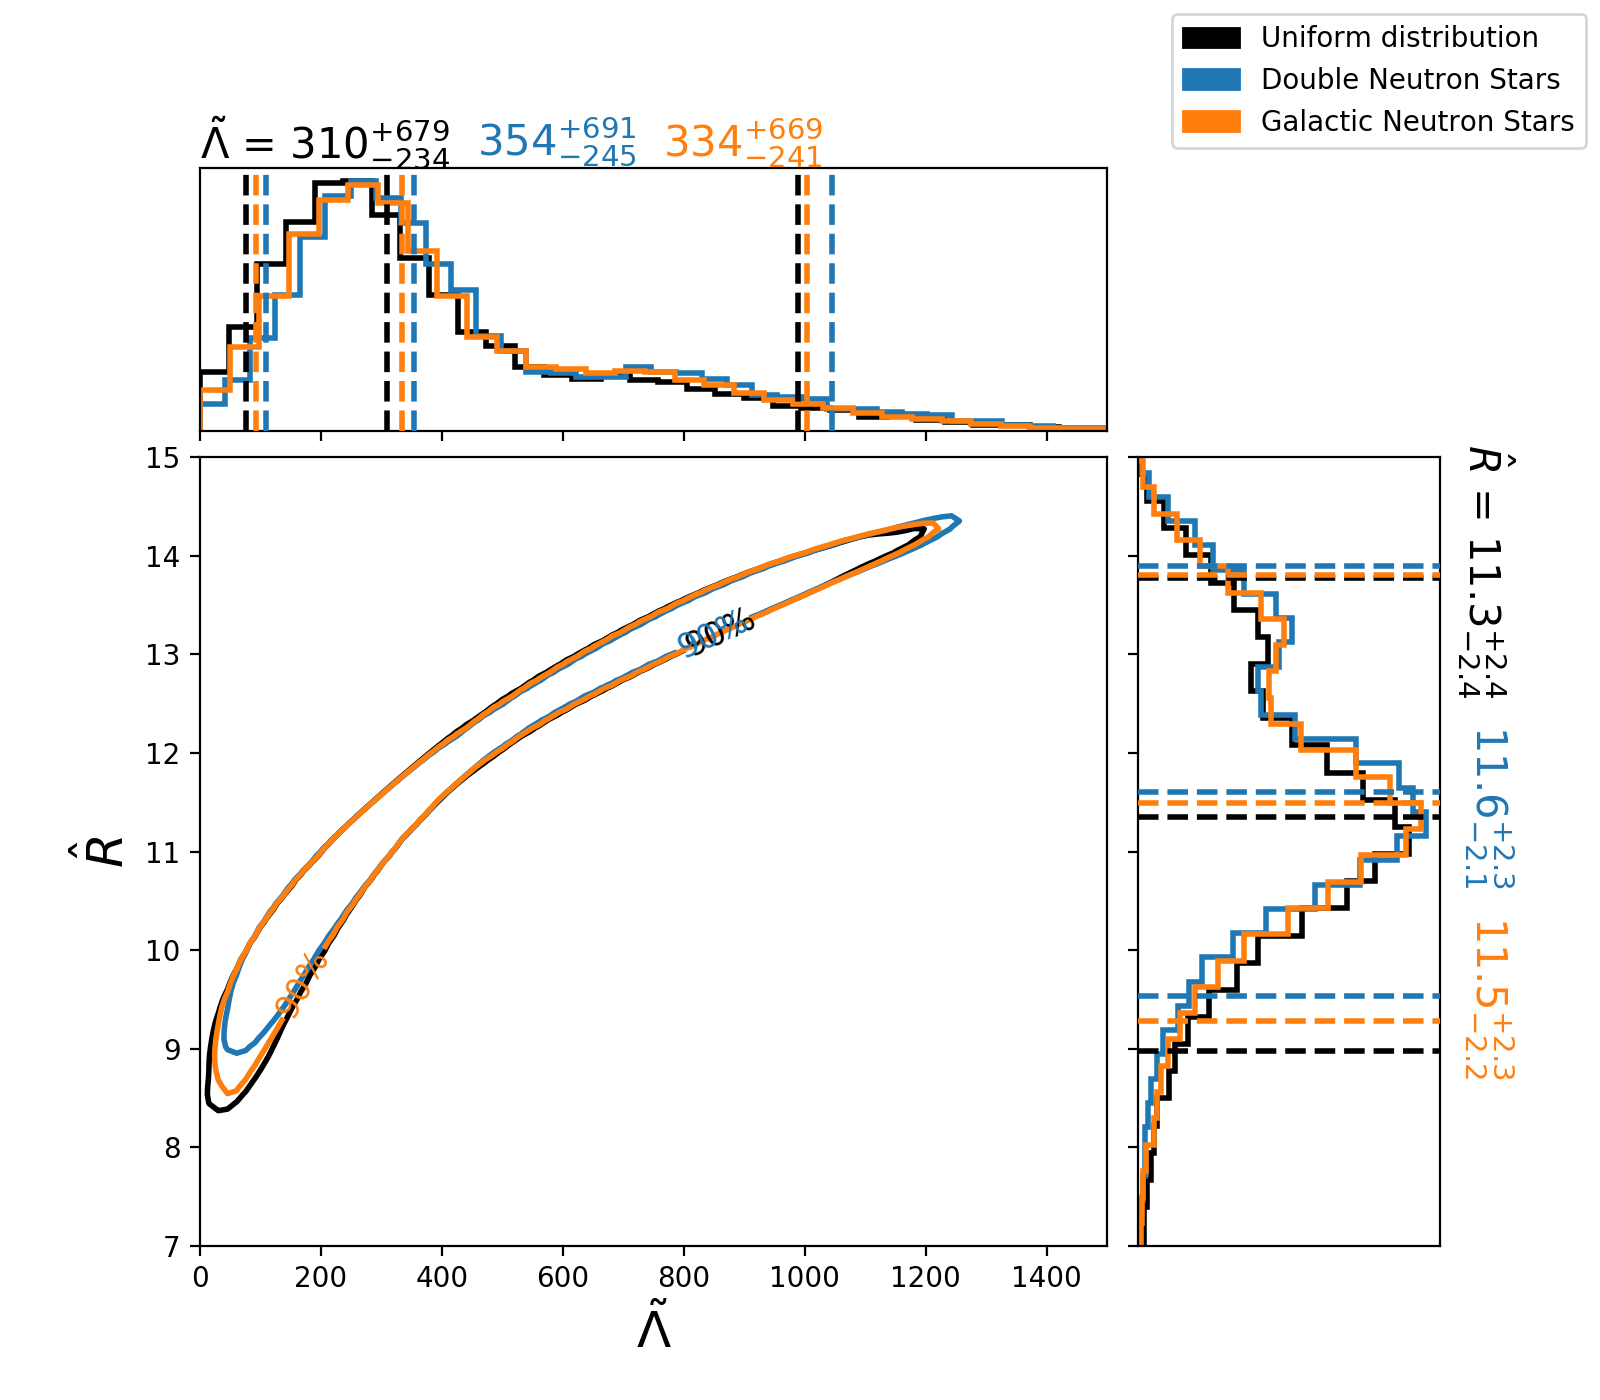

In [7]:
!pycbc_inference_plot_posterior\
    --input-file uniform_mass_prior_common_eos_posteriors.hdf dns_mass_prior_common_eos_posteriors.hdf \
    galactic_ns_mass_prior_common_eos_posteriors.hdf \
    --output-file radius_lambda_tilde_posterior.png \
    --plot-marginal \
    --plot-contour \
    --contour-percentiles 90 \
    --parameters \
            'lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)):$\tilde{\Lambda}$' \
            '11.2*(mchirp/(1+redshift(40.7)))*((lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)))/800)**(1./6.):$\hat R$' \
    --mins '11.2*(mchirp/(1+redshift(40.7)))*((lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)))/800)**(1./6.):7'\
    --maxs 'lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)):1500' \
        '11.2*(mchirp/(1+redshift(40.7)))*((lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)))/800)**(1./6.):15.0'\
    --input-file-labels "Uniform distribution" "Double Neutron Stars" "Galactic Neutron Stars" \
    --verbose
    
Image('radius_lambda_tilde_posterior.png')

## To plot Fig. 2 - supplementary material :
### Posterior probability density from unconstrained $\Lambda_{1,2}$, $m_{1,2} \sim U[1, 2] M_\odot$ analysis with 50% and 90% upper limit contours from our analysis vs. LVC analysis

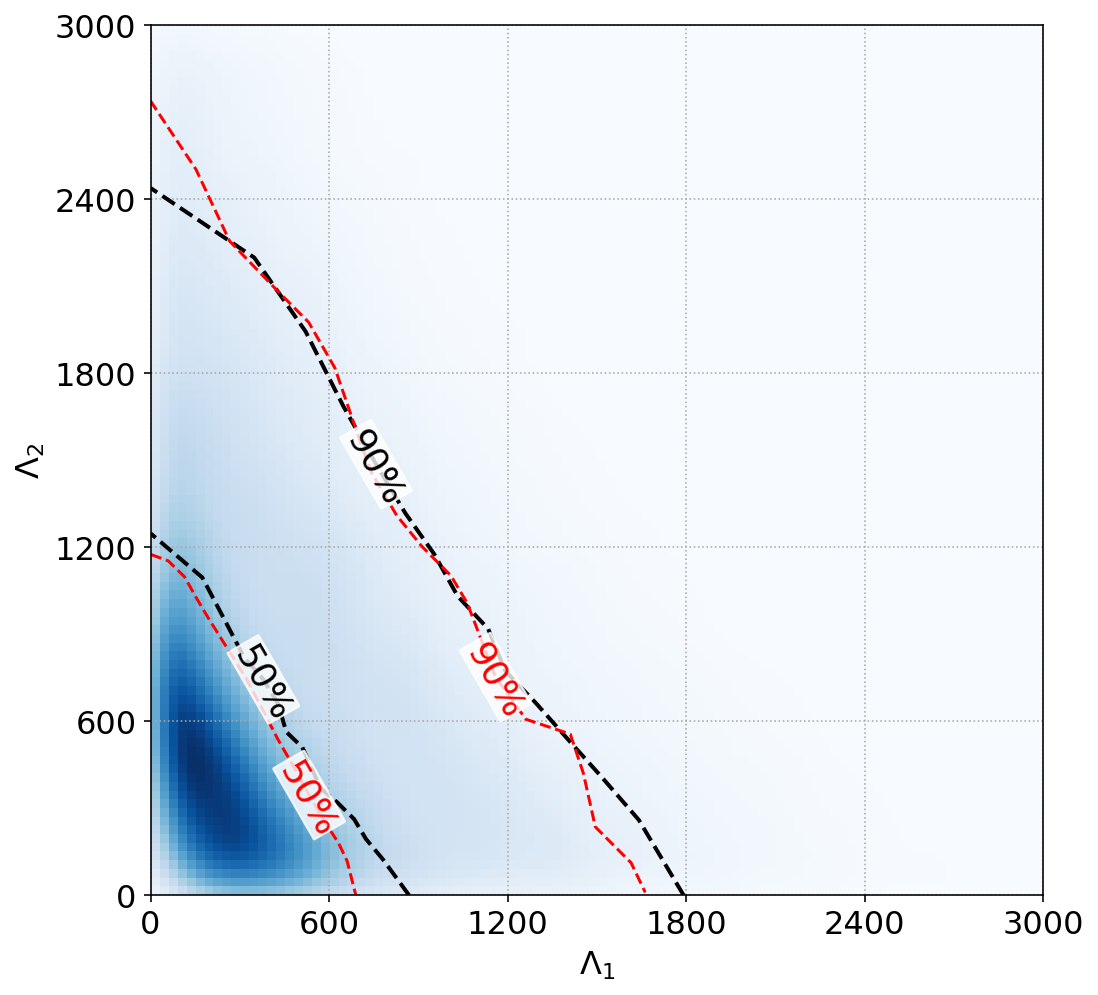

In [8]:
from math import ceil
from scipy.interpolate import UnivariateSpline

filename = 'independent_lambda_uniform_mass_posterior.hdf'
params = ['lambda1', 'lambda2']
with InferenceFile(filename, "r") as fp:
    samples = fp.read_samples(params)


def angsort(data, phi_step=1.0):
    """This sorts posterior samples into angular bins of width `phi_step.`
    Returns a list of tuples of format:
    (bin location in deg, 50% radial distance, 90% radial distance)
    """
    lambda1 = data['lambda1']
    lambda2 = data['lambda2']
    max_lambda = max(lambda1+lambda2)
    ang_bin_dict = {i*phi_step: [] for i in range(int(90/phi_step))}

    for l1, l2 in zip(lambda1, lambda2):
        phi = numpy.arctan(l2/l1) * 180./numpy.pi
        d = numpy.sqrt(l1**2 + l2**2)

        # sort into 1D (angular) bin
        for a in ang_bin_dict:
            if phi >= a and phi < a+phi_step:
                ang_bin_dict[a].append(d)

    contour_points_1D = []
    for bound in ang_bin_dict:
        num_samples = len(ang_bin_dict[bound])
        # sort into ascending order so we can get upper bounds
        ang_bin_dict[bound].sort()
        if bound == 0:
            b = bound
        elif bound == 90 - phi_step:
            b = 90*numpy.pi/180.
        else:
            b = (bound+0.5*phi_step)*numpy.pi/180.
        try:
            contour_points_1D.append((b,
                                  ang_bin_dict[bound][int(round(0.5*num_samples))],
                                  ang_bin_dict[bound][int(round(0.9*num_samples))]))
        except IndexError:
            print("Bin {} has zero samples".format(b))

    contour_points_1D.sort(key=lambda x: x[0])
    return contour_points_1D

# digitized LVC contours
lambda1_lvc50 = [1.2135922330096491, 59.46601941747565, 114.07766990291248, 154.12621359223294, 194.1747572815533, 321.6019417475727, 427.1844660194174, 478.1553398058252, 532.7669902912621, 580.0970873786407, 631.0679611650485, 660.1941747572816, 689.3203883495146,]
lambda2_lvc50 = [1175.1736234143577, 1153.1340797959037, 1098.2566791864501, 1025.1665367443834, 955.7260293388135, 747.3867904471686, 539.1007015803275, 447.7358089433769, 345.41315285947076, 261.3563886329812, 180.94040110551987, 118.82573878534458, 1.9665509177234526]
lambda1_lvc90 = [-0.567126636733633, 152.54824984132188, 265.7384987893462, 429.59989656550454, 531.5504595782692, 619.0965937140037, 666.6558922400619, 703.2399680293378, 743.4648205176428, 827.3525470744495, 911.1433037918147, 1009.4530901055504, 1064.1617104304287, 1159.2097839629514, 1261.2573168151584, 1410.2911445967234, 1454.2008509838029, 1494.6020122710925, 1614.7564587790034, 1662.2187874656197]
lambda2_lvc90 = [2740.2912621359224, 2503.640776699029, 2256.0679611650485, 2081.3106796116504, 1975.7281553398059, 1819.1747572815534, 1677.1844660194174, 1567.9611650485438, 1455.097087378641, 1309.4660194174758, 1203.883495145631, 1101.9417475728155, 1007.2815533980583, 752.4271844660193, 606.7961165048546, 555.8252427184466, 421.11650485436894, 235.43689320388376, 111.65048543689318, 9.708737864077648]

# get angular-binned contours
contour_points = angsort(samples, phi_step=6)

# convert to cartesian, make spline fits, and plot
phis, rad1, rad2 = zip(*contour_points)
xx1 = numpy.array([r*numpy.cos(p) for p, r in zip(phis, rad1)])
yy1 = numpy.array([r*numpy.sin(p) for p, r in zip(phis, rad1)])
idx1 = numpy.argsort(xx1)
sp1 = UnivariateSpline(xx1[idx1], yy1[idx1], k=5, s=0)

xx2 = numpy.array([r*numpy.cos(p) for p, r in zip(phis, rad2)])
yy2 = numpy.array([r*numpy.sin(p) for p, r in zip(phis, rad2)])
idx2 = numpy.argsort(xx2)
sp2 = UnivariateSpline(xx2[idx2], yy2[idx2], k=5, s=0)

# Make plot
fig, ax = plt.subplots(figsize=(8, 8))
create_density_plot('lambda1', 'lambda2', samples, fig=fig, ax=ax,
                    plot_density=True, plot_contours=False, cmap='Blues',
                    xmax=3000, ymax=3000, contour_color='k')

# Plot 50% and 90% upper limits from our analysis
bbox_props = dict(boxstyle="round,pad=0.03", fc='w', ec='w', alpha=0.8)
ax.text(xx1[int(len(xx1)/1.5)], sp1(xx1)[int(len(sp1(xx1))/1.5)], r'50$\%$', color='k', va="center", ha="center", bbox=bbox_props, rotation=300, zorder=5, fontsize=18)
ax.plot(xx1, sp1(xx1), linestyle='--', color="k", linewidth=2)
ax.text(xx2[int(len(xx2)/1.5)], sp2(xx2)[int(len(sp2(xx2))/1.5)], r'90$\%$', color='k', va="center", ha="center", bbox=bbox_props, rotation=300, zorder=5, fontsize=18)
ax.plot(xx2, sp2(xx2), linestyle='--', color="k", linewidth=2)

# Plot 50% and 90% upper limit from LVC analysis
ax.plot(lambda1_lvc50, lambda2_lvc50, 'red', linestyle='--')
ax.text(lambda1_lvc50[int(len(lambda1_lvc50)/1.5)], lambda2_lvc50[int(len(lambda2_lvc50)/1.5)], r'50$\%$', color='red', va="center", ha="center", bbox=bbox_props, rotation=300, zorder=5, fontsize=18)
ax.plot(lambda1_lvc90, lambda2_lvc90, 'red', linestyle='--')
ax.text(lambda1_lvc90[int(len(lambda1_lvc90)/1.5)], lambda2_lvc90[int(len(lambda2_lvc90)/1.5)], r'90$\%$', color='red', va="center", ha="center", bbox=bbox_props, rotation=300, zorder=5, fontsize=18)

ax.grid(linestyle='dotted', color='darkgray')
ticks = [0, 600, 1200, 1800, 2400, 3000]
h = ax.set(xlim=(0, 3000), ylim=(0, 3000), xticks=ticks, yticks=ticks,
           xlabel=r"$\Lambda_1$", ylabel=r"$\Lambda_2$")

## To plot Fig. 4 - supplementary material
### Full posteriors plot

We use the predefined transform in PyCBC to transform to `mchirp` using the `mass1`, `mass2` posteriors and transform to `chi_eff` using `mass1`, `mass2`, `spin1z`, `spin2z` posteriors stored in the data files. Note that this can take ~10 minutes to finish plotting.

2018-04-23 12:46:28,459 Loading parameters
2018-04-23 12:46:28,460 Reading input file uniform_mass_prior_common_eos_posteriors.hdf
2018-04-23 12:46:28,461 Loading samples
2018-04-23 12:46:28,490 Reading input file dns_mass_prior_common_eos_posteriors.hdf
2018-04-23 12:46:28,491 Loading samples
2018-04-23 12:46:28,518 Reading input file galactic_ns_mass_prior_common_eos_posteriors.hdf
2018-04-23 12:46:28,519 Loading samples
2018-04-23 12:46:28,593 Plotting
/home/daniel.finstad/opt/pycbc-dev/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
2018-04-23 13:00:29,305 Done


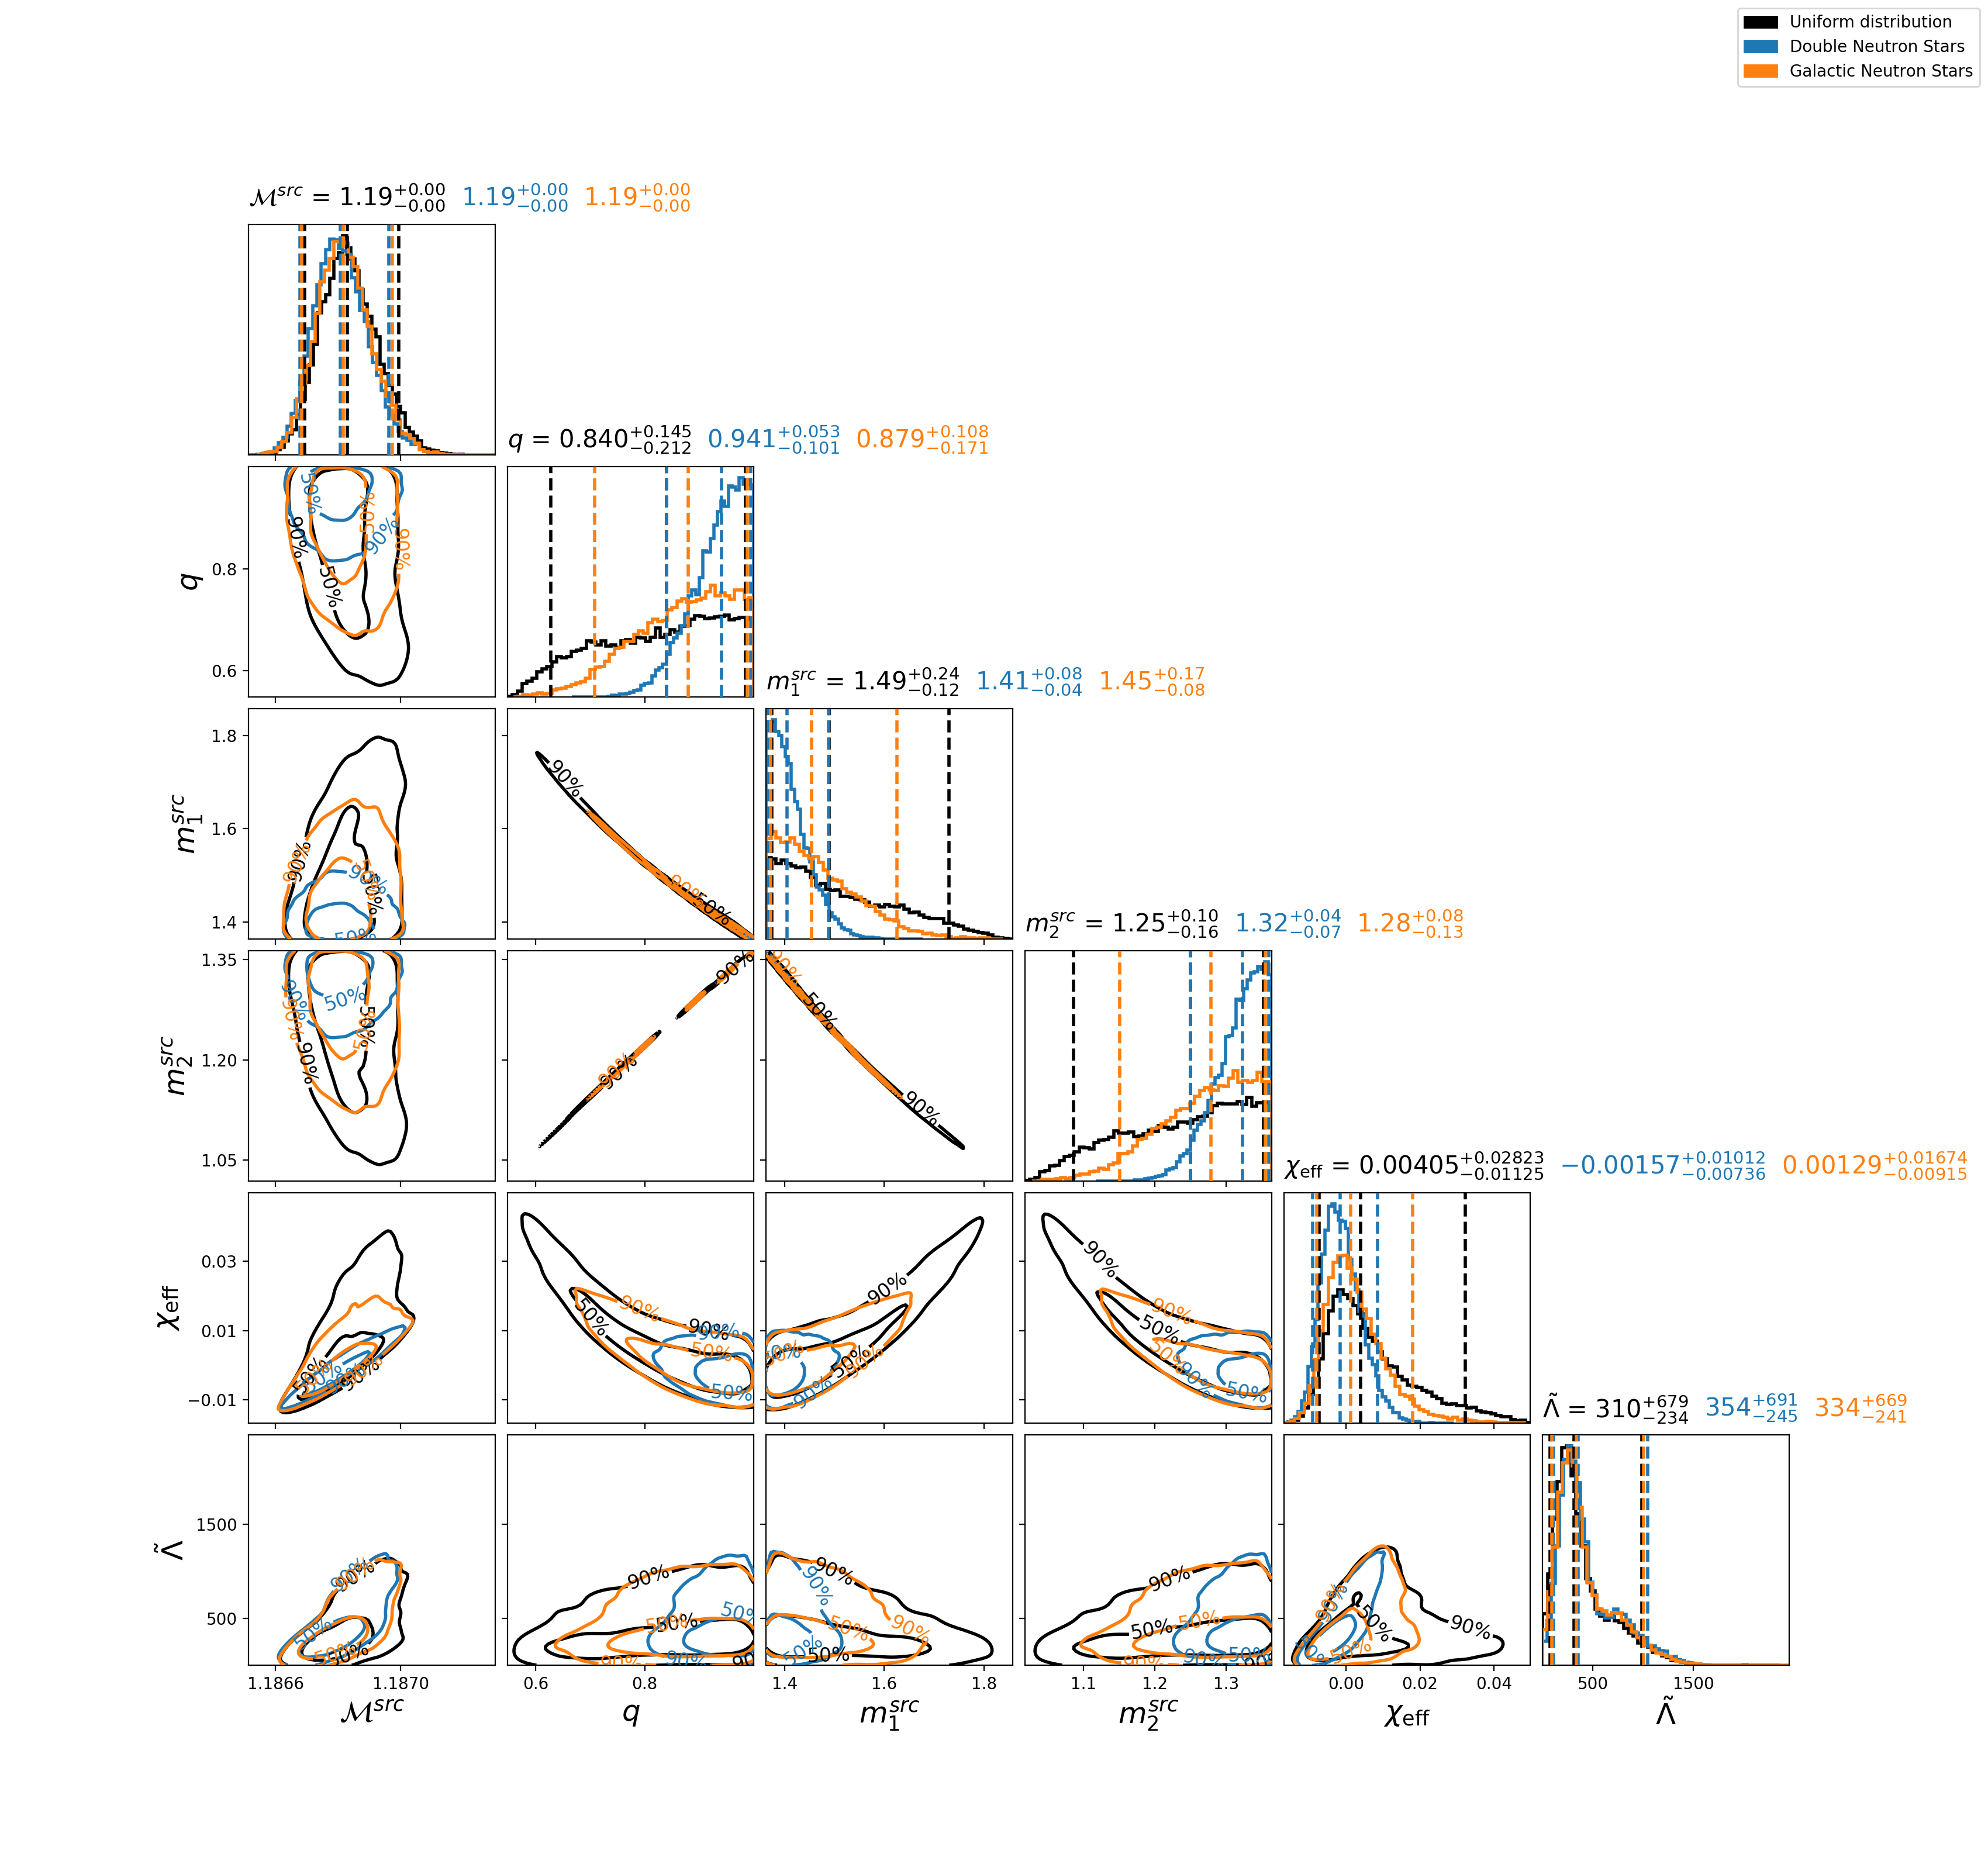

In [9]:
!pycbc_inference_plot_posterior \
    --input-file uniform_mass_prior_common_eos_posteriors.hdf dns_mass_prior_common_eos_posteriors.hdf \
    galactic_ns_mass_prior_common_eos_posteriors.hdf \
    --output-file full_posteriors_common_eos.png \
    --plot-marginal \
    --plot-contour \
    --parameters \
            "mchirp/(1+redshift(40.7)):$\mathcal{M}^{src}$" \
            "mass2/mass1:\$q$" \
            "mass1/(1+redshift(40.7)):\$m_1^{src}$" \
            "mass2/(1+redshift(40.7)):\$m_2^{src}$" \
            chi_eff \
            'lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)):$\tilde{\Lambda}$' \
    --input-file-labels "Uniform distribution" "Double Neutron Stars" "Galactic Neutron Stars" \
    --verbose
    
Image('full_posteriors_common_eos.png')

## Acknowledgements

We thank Stefan Ballmer, Swetha Bhagwat, Steven Reyes, Andrew Steiner, and Douglas Swesty for helpful discussions. We particularly thank Collin Capano and Alexander Nitz for contributing to the development of PyCBC Inference; however, they did not wish to be authors due to restrictions placed by LIGO Scientific Collaboration policies.


## Funding

This work was supported by NSF awards PHY-1404395 (DAB, CMB), PHY-1707954 (DAB, SD, DF), AST-1714498 (EB), and DOE Award DE-FG02-87ER40317 (JML). Computations were supported by Syracuse University and NSF award OAC-1541396. DAB, EB, SD, and JML thank Kavli Institute for Theoretical Physics which is supported by the NSF award PHY-1748958.